# Haberman's Survival Data set

This dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1. Age of patient at time of operations (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive auxillary nodes detected (numerical)
4. Survival Status (Class attribute)
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 year
    
For further more details and to download the dataset, <a href="https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival">click here</a>

## Exploratory Data Analysis

### Objective:
* classify whether a patient undergone surgery for breast cancer survived more than 5years or died within 5 year.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Haberman's Dataset from the directory
# Let us provide the column names for the features (For details visit the source given above)
columns = ["age", "operationYear", "auxilliaryNode", "output"]
haberman =  pd.read_csv("haberman.csv", header=None, names=columns)
haberman.columns

Index(['age', 'operationYear', 'auxilliaryNode', 'output'], dtype='object')

In [3]:
# how many observations and features are there in this dataset?
print(haberman.shape)

(306, 4)


__Observation__:
1. There are 306 observations and consists of 4 features which includes the class attribute as well.

In [4]:
# How many observations are there for each class?
# How many patient survied longer than 5 years and died before 5 years of surgery?
haberman["output"].value_counts()

1    225
2     81
Name: output, dtype: int64

__Observation:__
Out of 306 patients who have undergone surgery: 
1. 225 survived for more than 5 years.
2. 81 patients died within 5 years of surgery.

### 1. Univariate Analysis

#### 1.1 Probability Density Function (PDF)

/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


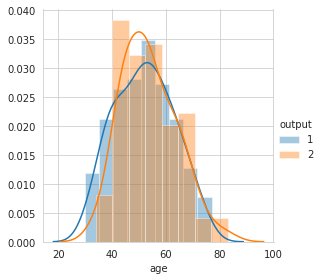

In [5]:
# Let us create a PDF with Age as a parameter.
sns.set_style("whitegrid")
sns.FacetGrid(
    haberman,
    hue = "output", 
    size = 4
).map(
    sns.distplot, 'age'
).add_legend()
plt.show()

__Observation__:
1. From the histogram above, we saw the distribution for output class according to their age is overlapping.
2. Also, the patient having the age greater than 40 are more likely to die.
3. The patient less than age 40 are more likely to survive.

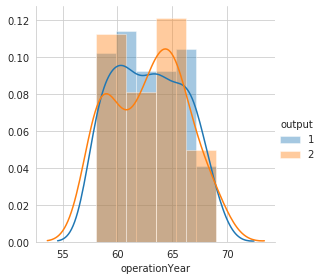

In [6]:
# According to OperationYear
sns.FacetGrid(
    haberman,
    hue="output",
    size=4
).map(
    sns.distplot, "operationYear"
).add_legend()
plt.show()

__Observation :__
1. The plot represents the immense overlapping of two classes.
2. It is clearly seen that patient who had operation in the year between 58-61 and 63-66 died.

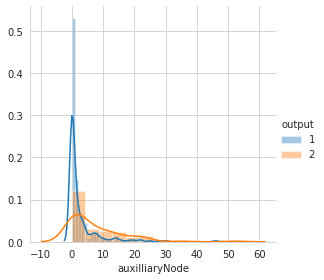

In [8]:
# Auxilliary Nodes
sns.FacetGrid(
    haberman,
    hue="output",
    size=4
).map(
    sns.distplot, "auxilliaryNode"
).add_legend()
plt.show()

__Observations:__
1. Here the graph is partially overlapped.
2. Patients having 0 auxilliary nodes are more likely to survive. (class 1)

In [9]:
survived = haberman.loc[haberman["output"] == 1]
died = haberman.loc[haberman["output"] == 2]

#### 1.2 Cummulative Density Function (CDF)

Probability Density Function: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


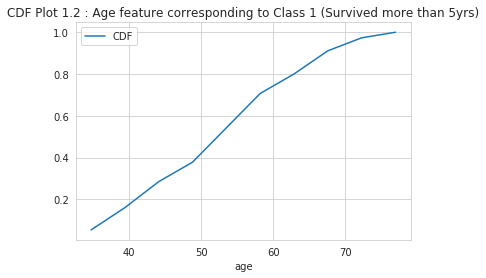

In [10]:
# According to Age with class 1 (Survived)

counts, bin_edges = np.histogram(survived['age'], bins=10, density=True)
pdf = counts / sum(counts)
print(f"Probability Density Function: {pdf}")
print(f"Bin Edges: {bin_edges}")

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.xlabel("age")
plt.title("CDF Plot 1.2 : Age feature corresponding to Class 1 (Survived more than 5yrs)")
plt.legend()
plt.show()

__Observation:__
1. It is clear from the plot that the age group 50-60 have greater rate of survival.
2. Almost 90% patient who survived have the age less than or equal to 70

Probability Density Function: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


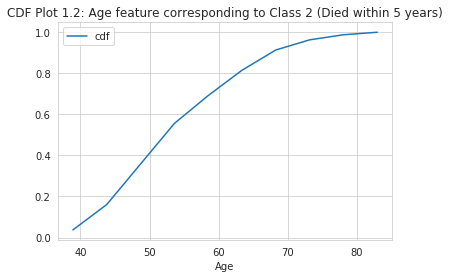

In [11]:
# According to Age with class 2 (Died)

counts, bin_edges = np.histogram(a=died['age'], bins=10, density=True)
pdf = counts / sum(counts)
print(f"Probability Density Function: {pdf}")
print(f"Bin Edges: {bin_edges}")

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label="cdf")
plt.xlabel("Age")
plt.title("CDF Plot 1.2: Age feature corresponding to Class 2 (Died within 5 years)")
plt.legend()
plt.show()

__Observation:__
1. It is observed that around 75% of patient who died within 5 years of surgery have an age less than or equal to 60 years.